<a href="https://colab.research.google.com/github/shrushti-sd/Prodigy_ML_01/blob/main/Prodigy_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

1.load the dataset

In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')

2.select relevent features for clustering

In [ ]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]

3.Standardize the features

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

4.Determine optimal no. of clusters using the Elbow method

In [ ]:
wcss = []
silhouette_scores_list = [] # Renamed the variable to avoid conflict
max_clusters = 10

for i in range(2,max_clusters+1):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)


5.Plot the Elbow method graph

Text(0, 0.5, 'WCSS')

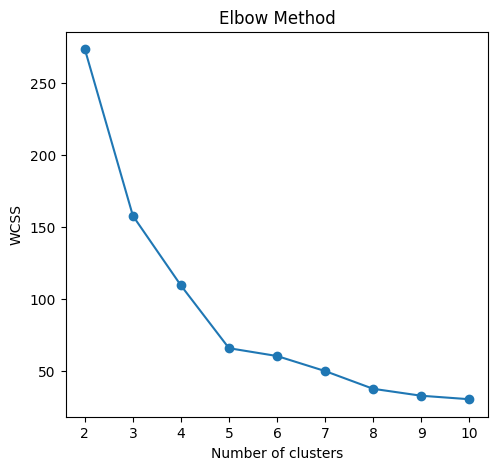

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(2,max_clusters+1),wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


6.Plot Silhouette Scores

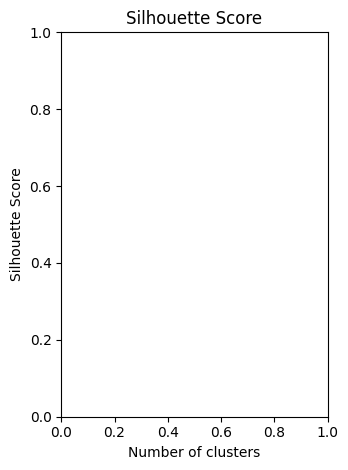

In [ ]:
plt.subplot(1,2,2)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

In [ ]:
optimal_clusters = 5

7.Create and  fit the final K-means model

In [ ]:
kmeans = KMeans(n_clusters=optimal_clusters,init='k-means++',random_state=42)
clusters = kmeans.fit_predict(X_scaled)

8.Add cluster labels to the original data

In [ ]:
data['Cluster'] = clusters

9.Visualize the clusters

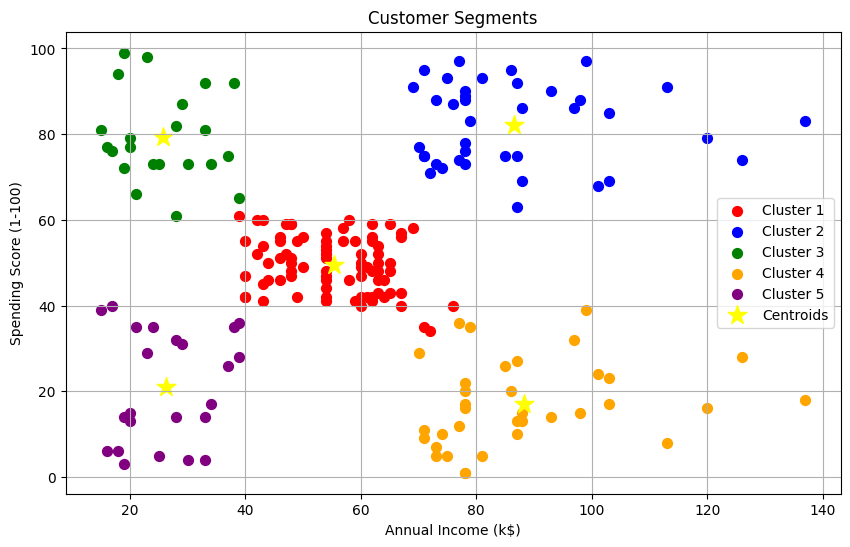

In [ ]:
plt.figure(figsize=(10,6))
colors = ['red','blue','green','orange','purple']
for i in range(optimal_clusters):
  plt.scatter(data[data['Cluster']==i]['Annual Income (k$)'],data[data['Cluster']==i]['Spending Score (1-100)'],s=50, c=colors[i], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:,0]*scaler.scale_[0] + scaler.mean_[0], kmeans.cluster_centers_[:,1]*scaler.scale_[1] + scaler.mean_[1], s=200 , c='yellow', marker='*', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

10.Analyze the clusters

In [ ]:
cluster_summary = data.groupby('Cluster').agg({'Annual Income (k$)':'mean','Spending Score (1-100)':'mean'})
print("\nCluster Summary:")
print(cluster_summary)



Cluster Summary:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


11.Interpretation of clusters

In [ ]:
print("\nCluster Interpretation:")
print("1. High Income, Low Spending (Target for premium products)")
print("2. Average Income & Spending(Typical customers)")
print("3. High Income, High Spending (Best customers)")
print("4. Low Income, High Spending (Bargain hunters)")
print("5. Low Income, Low Spending (Need incentives to spend more)")


Cluster Interpretation:
1. High Income, Low Spending (Target for premium products)
2. Average Income & Spending(Typical customers)
3. High Income, High Spending (Best customers)
4. Low Income, High Spending (Bargain hunters)
5. Low Income, Low Spending (Need incentives to spend more)
